Theophanie Scholastica Tanzil's Notebook

---



Since the book's first chapter does not provide any code that can be remade, I will try to show code examples based on the book's explanation here!

# The Basics of Data

In [1]:
# libraries used in this colab

import re
import json
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tree import Tree
from wordcloud import WordCloud
from nltk.corpus import gutenberg
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize

Explanation about the libraries above will be given in this link: https://shorturl.at/BoU5d

## Categories of Data

### Unstructured Data
This category lacks a predefined format or organizational system. Common exammples include text, images, audio, and video. In this example, we will work with textual data using the Natural Language Toolkit (NLTK) to demonstratet how to handle unstructured data.

In [2]:
# download the data

nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### **1.1 Example 1: Financial Statement Text**

In [3]:
financial = """
GoodComp shares soared as much as 8.2% on 2021-01-07 after the company announced positive early-stage trial results for its vaccine.
Following the January 7, 2021, release of positive results from its vaccine trial, which is still in its early stages, shares in GoodComp rose by 8.2%.
"""

print("Unstructured Financial Statement:")
print(financial)

Unstructured Financial Statement:

GoodComp shares soared as much as 8.2% on 2021-01-07 after the company announced positive early-stage trial results for its vaccine.
Following the January 7, 2021, release of positive results from its vaccine trial, which is still in its early stages, shares in GoodComp rose by 8.2%.




Tokenized Sentences:
1. 
GoodComp shares soared as much as 8.2% on 2021-01-07 after the company announced positive early-stage trial results for its vaccine.
2. Following the January 7, 2021, release of positive results from its vaccine trial, which is still in its early stages, shares in GoodComp rose by 8.2%.

Total Words: 54
Unique Words: 37


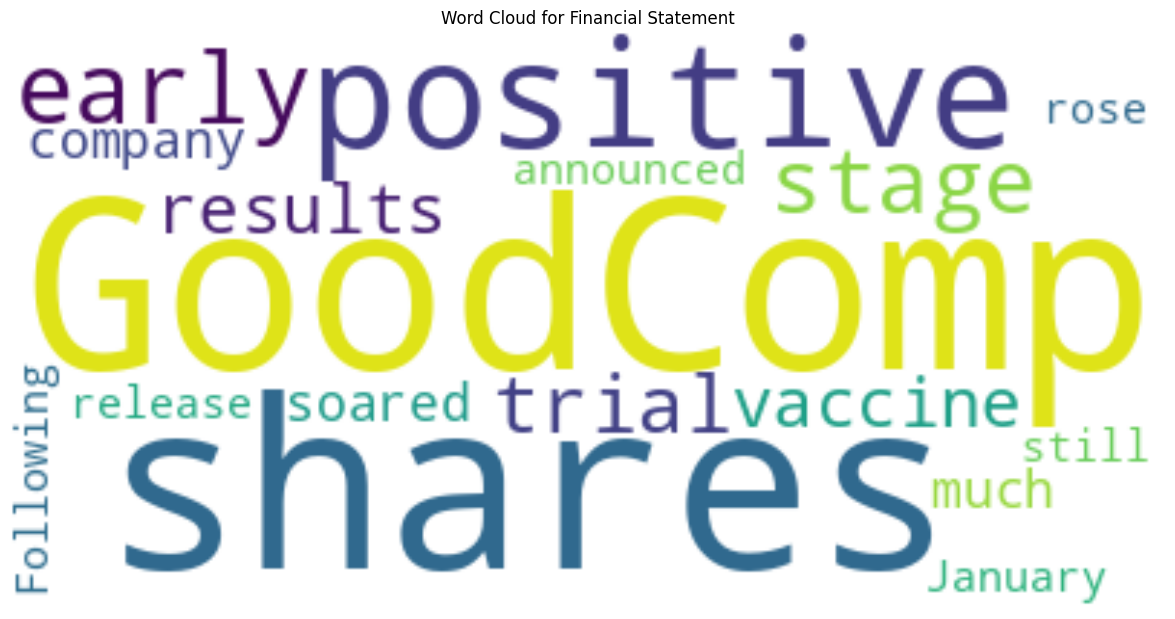


Extracted Data: [{'Company': 'GoodComp', 'StockChange': '8.2', 'Date': '2021-01-07'}]


In [4]:
# basic text processing
# tokenize the text into sentences
sentences = nltk.sent_tokenize(financial)
print("\nTokenized Sentences:")
for idx, sentence in enumerate(sentences, 1):
    print(f"{idx}. {sentence}")

# tokenize the text into words
words = nltk.word_tokenize(financial)
print(f"\nTotal Words: {len(words)}")
print(f"Unique Words: {len(set(words))}")

# word cloud
wordcloud = WordCloud(width=400, height=200, background_color='white').generate(financial)

# display
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Financial Statement")
plt.show()

# regex for extracting structured information
# information: company name, date, and stock exchange
pattern = r"(?P<Company>\w+)\s+shares\s+soared\s+as\s+much\s+as\s+(?P<StockChange>[+\-]?\d+(\.\d+)?)%\s+on\s+(?P<Date>\d{4}-\d{2}-\d{2})"
matches = re.finditer(pattern, financial)

# list for extracted data
extracted_data = []
for match in matches:
    extracted_data.append({
        'Company': match.group('Company'),
        'StockChange': match.group('StockChange'),
        'Date': match.group('Date')
    })

print(f"\nExtracted Data: {extracted_data}")

### **1.2 Example 2: Literary Text from NLTK's Gutenberg Corpus**

First 1000 Characters of 'Emma' by Jane Austen:
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold

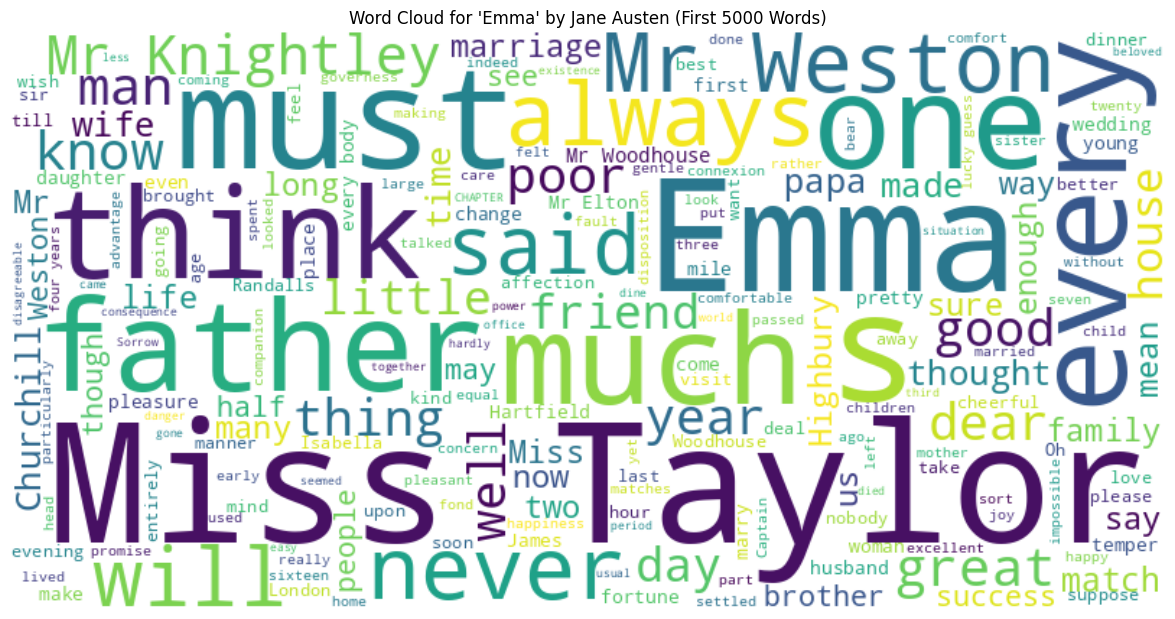


Top 10 Most Common Names in 'Emma':
Mr: 1153
Emma: 865
Mrs: 699
Miss: 592
She: 562
Harriet: 506
He: 441
Weston: 439
It: 400
Knightley: 389


In [5]:
# unstructured text from Gutenberg Corpus
# "Emma" by Jane Austen
emma_text = gutenberg.raw('austen-emma.txt')

# first 1000 characters of the text
print("First 1000 Characters of 'Emma' by Jane Austen:")
print(emma_text[:1000])

# basic text processing
# text into sentences
sentences = nltk.sent_tokenize(emma_text)
print(f"\nTotal Sentences: {len(sentences)}")

# text into words
words = nltk.word_tokenize(emma_text)
print(f"Total Words: {len(words)}")
print(f"Unique Words: {len(set(words))}")

# word cloud
subset_text = ' '.join(words[:5000])  # First 5000 words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subset_text)

# display
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for 'Emma' by Jane Austen (First 5000 Words)")
plt.show()

# regex for extracting all occurrences of names
name_pattern = r'\b[A-Z][a-z]+\b'

# find all names
names = re.findall(name_pattern, emma_text)

# frequency distribution of names
from collections import Counter
name_counts = Counter(names)

# the 10 most common names
print("\nTop 10 Most Common Names in 'Emma':")
for name, count in name_counts.most_common(10):
    print(f"{name}: {count}")

### Structured Data
This type of data is organized in a predefined format, typically in rows and columns, making it easy to analyze and query. A common example is a tabular dataset like those used in spreadsheets or SQL databases.

### **Example: Iris Dataset from Seaborn**

In [6]:
iris = sns.load_dataset('iris')

# display
print("First 5 rows of the Iris dataset:")
print(iris.head())

# stats
print("\nDataset Summary:")
print(iris.describe())

First 5 rows of the Iris dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

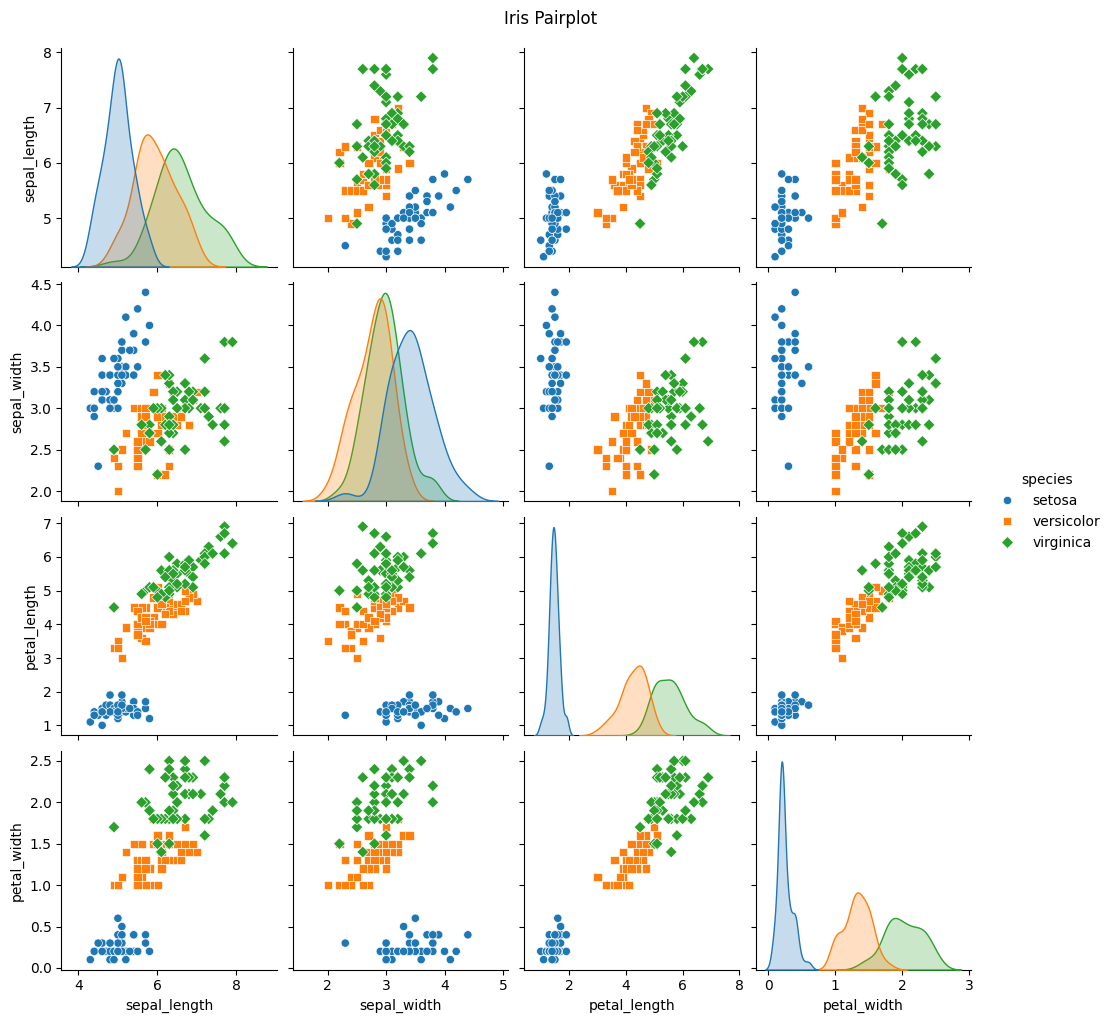

In [7]:
# viz
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.suptitle("Iris Pairplot", y=1.02)
plt.show()

# optional, save the data:
# iris.to_csv('iris_dataset.csv', index=False)

### Semistructured Data
This type of data does not conform to a rigid structure like structured data but contains tags or markers to separate semantic elements, making it easier to analyze than unstructured data. Common examples include JSON, XML, and time series data.

In [8]:
# if the financial data written in JSON format
financial_json = """
[
    {
        "Company": "GoodComp",
        "Date": "2021-01-07",
        "StockChange": "+8.2%",
        "Event": "positive early-stage trial results for its vaccine"
    },
    {
        "Company": "GoodComp",
        "Date": "2021-01-07",
        "StockChange": "+8.2%",
        "Event": "positive early-stage trial results for its vaccine"
    }
]
"""

print(type(financial_json))

<class 'str'>


In [9]:
# parse the data
financial_json = json.loads(financial_json)

# convert to DataFrame
financial_df = pd.DataFrame(financial_json)

# display
print("Financial Data in DataFrame Format:")
print(financial_df)

Financial Data in DataFrame Format:
    Company        Date StockChange  \
0  GoodComp  2021-01-07       +8.2%   
1  GoodComp  2021-01-07       +8.2%   

                                               Event  
0  positive early-stage trial results for its vac...  
1  positive early-stage trial results for its vac...  


In [10]:
# basic analysis
financial_df['StockChangeNumeric'] = financial_df['StockChange'].str.rstrip('%').astype(float)

average_change = financial_df['StockChangeNumeric'].mean()
print(f"\nAverage Stock Change: {average_change}%")


Average Stock Change: 8.2%


In [11]:
# add new entry
new_entry = {
    "Company": "GoodComp",
    "Date": "2021-02-15",
    "StockChange": "-3.5%",
    "Event": "market fluctuation due to regulatory concerns"
}

financial_json.append(new_entry)

financial_df = pd.json_normalize(financial_json)

# display
print("\nUpdated Financial Data DataFrame:")
print(financial_df)


Updated Financial Data DataFrame:
    Company        Date StockChange  \
0  GoodComp  2021-01-07       +8.2%   
1  GoodComp  2021-01-07       +8.2%   
2  GoodComp  2021-02-15       -3.5%   

                                               Event  
0  positive early-stage trial results for its vac...  
1  positive early-stage trial results for its vac...  
2      market fluctuation due to regulatory concerns  


### Converting Unstructured Data to Structured Data

In [12]:
# download the data

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [13]:
# comeback to the previous financial statement
finance = """
GoodComp shares soared as much as 8.2% on 2021-01-07 after the company announced positive early-stage trial results for its vaccine.
Following the January 7, 2021, release of positive results from its vaccine trial, which is still in its early stages, shares in GoodComp rose by 8.2%.
"""

In [14]:
# list the named entities
def named_entities(text):
  chunked = ne_chunk(pos_tag(word_tokenize(text)))
  continuous_chunk = []
  current_chunk = []

  for i in chunked:
    if type(i) == Tree:
      current_chunk.append(" ".join([token for token, pos in i.leaves()]))
    elif current_chunk:
      named_entity = " ".join(current_chunk)
      if named_entity not in continuous_chunk:
        continuous_chunk.append(named_entity)
        current_chunk = []
    else:
      continue

  return continuous_chunk

named_entities(finance)

['GoodComp']

In [15]:
# extract
entities = named_entities(finance)
print(f"Named Entities: {entities}")

Named Entities: ['GoodComp']


In [16]:
# extract dates using regex
date_pattern1 = r'\d{4}-\d{2}-\d{2}'  # format: YYYY-MM-DD
date_pattern2 = r'\b(?:January|February|March|April|May|June|July|August|September|October|November|December) \d{1,2}, \d{4}\b'  # format: Month DD, YYYY

dates1 = re.findall(date_pattern1, finance)
dates2 = re.findall(date_pattern2, finance)
all_dates = dates1 + dates2
print("Dates Found:", all_dates)

Dates Found: ['2021-01-07', 'January 7, 2021']


In [17]:
# extract stock changes using regex
stock_pattern = r'([+\-]?\d+\.\d+)%'
stock_changes = re.findall(stock_pattern, finance)
print("Stock Changes:", stock_changes)

Stock Changes: ['8.2', '8.2']


In [18]:
structured_data = []

# assume each sentence corresponds to one data entry
sentences = nltk.sent_tokenize(finance)

for sentence in sentences:
    company = None
    date = None
    stock_change = None

    entities_in_sentence = named_entities(sentence)
    for ent in entities_in_sentence:
        if ent in ["GoodComp"]:
            company = ent
            break

    date_match1 = re.search(date_pattern1, sentence)
    date_match2 = re.search(date_pattern2, sentence)
    if date_match1:
        date = date_match1.group()
    elif date_match2:
        date = date_match2.group()
    else:
        date = "N/A"

    stock_match = re.search(stock_pattern, sentence)
    if stock_match:
        stock_change = stock_match.group(1) + "%"
    else:
        stock_change = "N/A"

    # structured data
    data_entry = {
        "Company": company if company else "N/A",
        "Date": date,
        "StockChange": stock_change
    }
    structured_data.append(data_entry)

# DataFrame
df_structured = pd.DataFrame(structured_data)
print("\nStructured Data Extracted from Unstructured Text:")
print(df_structured)


Structured Data Extracted from Unstructured Text:
    Company             Date StockChange
0  GoodComp       2021-01-07        8.2%
1  GoodComp  January 7, 2021        8.2%
